# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
file_path = '/content/drive/MyDrive/MachineLearningFinal/melb_data_cleaned.xlsx'
data = pd.read_excel(file_path)

# Data processing

In [3]:
# Select relevant columns and remove missing data
selected_columns = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                    'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname',
                    'Propertycount', 'Method', 'Price']

data = data[selected_columns].dropna()

In [4]:
# Convert categorical columns to numbers
categorical_cols = ['Type', 'Regionname', 'Method']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split data into input and output

In [5]:
X = data.drop('Price', axis=1)
y = data['Price']

# Divide the data into training set and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor

In [7]:
dt_model = DecisionTreeRegressor(random_state=42)

In [8]:
# Set of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [9]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [10]:
# Get the best model
best_model = grid_search.best_estimator_

In [11]:
# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model

In [12]:
# Calculate evaluation parameters
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
# Display evaluation results
print("Tuned Decision Tree Regressor")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Tuned Decision Tree Regressor
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Squared Error (MSE): 124608178228.19
Mean Absolute Error (MAE): 214535.55
R-squared (R2): 0.70


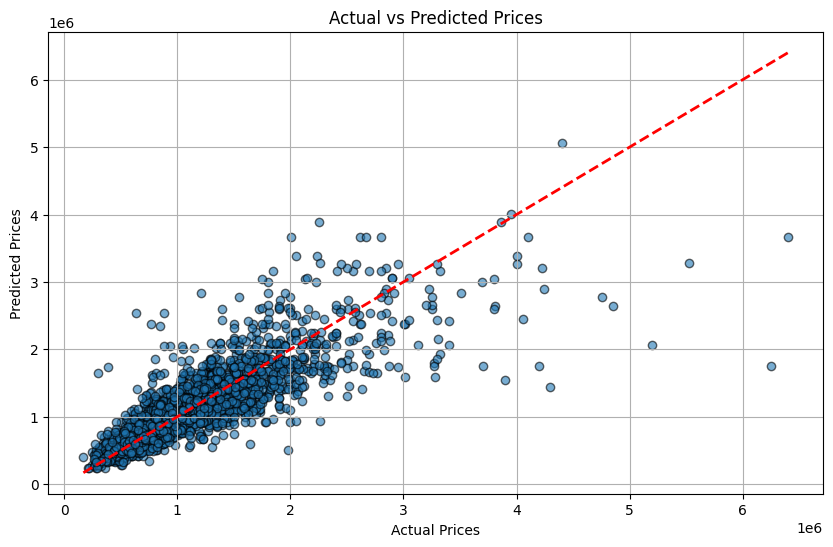

In [14]:
# Actual vs Predicted Prices Chart
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

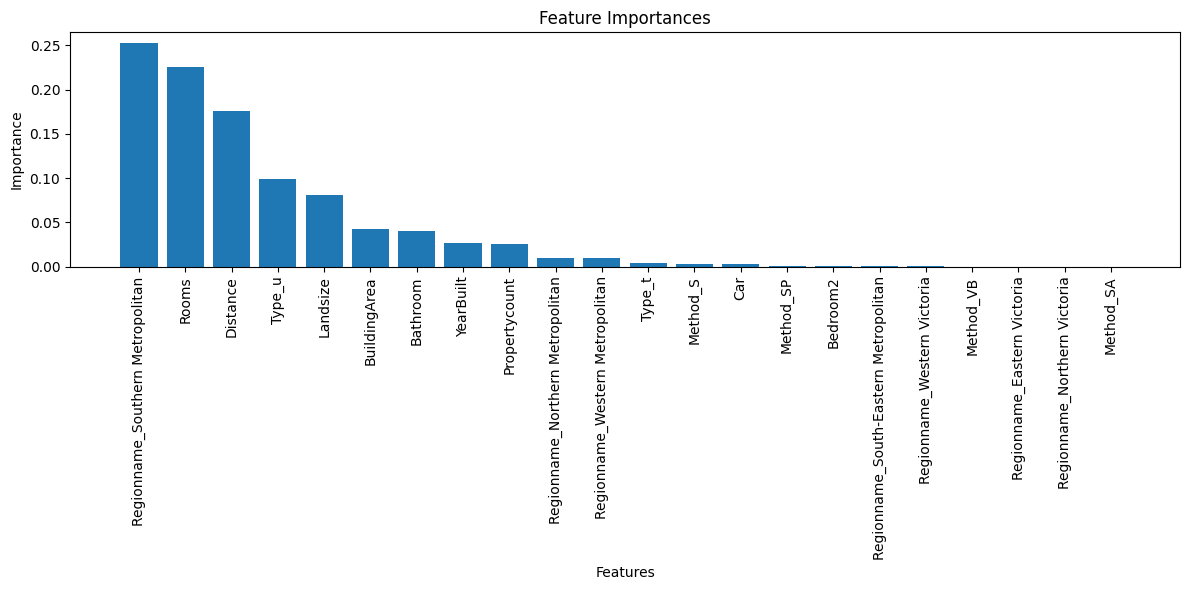

In [15]:
# Feature importance chart
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

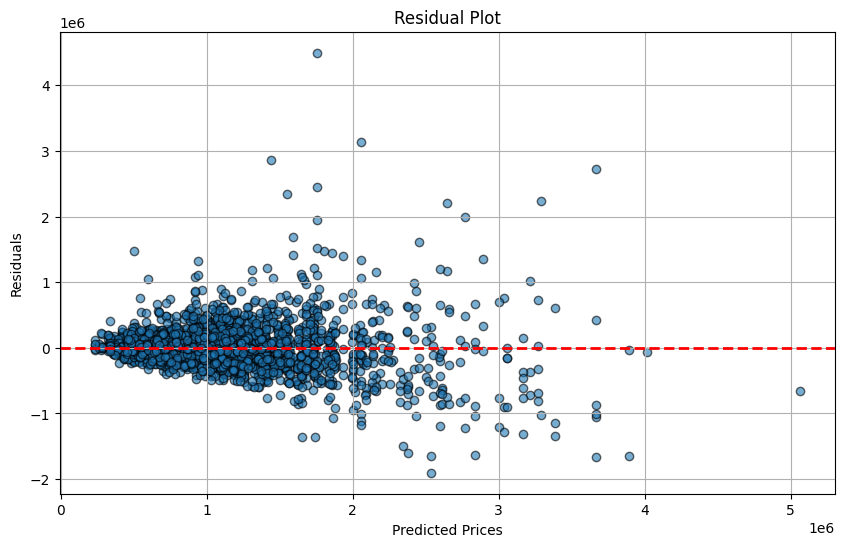

In [16]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

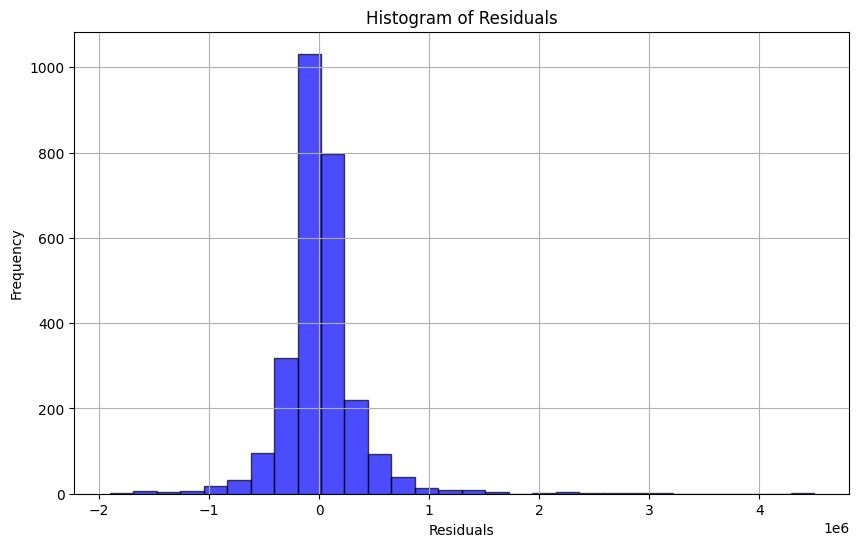

In [17]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='b', edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

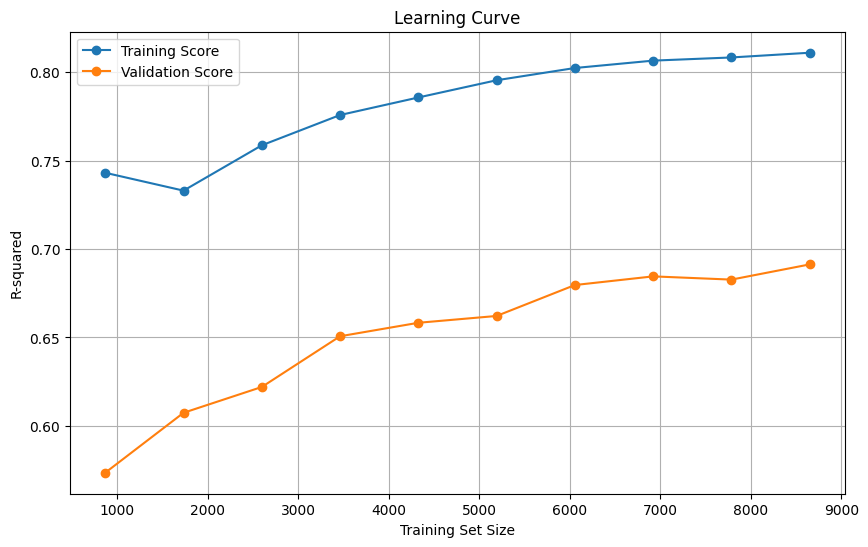

In [18]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Score", marker='o')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-squared")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Predict sample

In [19]:
# Sample any 5 houses from the test data set
sample_data = X_test.sample(5, random_state=42)

# Get the actual price of the houses
sample_data['Actual_Price'] = y_test.loc[sample_data.index]

# Price predictions for model homes
# Change dt_model to best_model to use the trained model
predicted_prices = best_model.predict(sample_data.drop(columns=['Actual_Price']))

# Add predicted price to sample data
sample_data['Predicted_Price'] = predicted_prices

# Display detailed information of any 5 houses with both actual and predicted prices
sample_data_display = sample_data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                                   'Landsize', 'BuildingArea', 'YearBuilt',
                                   'Propertycount', 'Actual_Price', 'Predicted_Price']]
print(sample_data_display)

      Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
993       4      13.1         4         4    4       707           162   
8832      2       5.3         2         1    1      2338          1482   
5324      2       2.6         2         1    0       108            72   
9079      3      10.1         3         2    2       602           180   
1491      4      11.8         4         2    2       744           300   

      YearBuilt  Propertycount  Actual_Price  Predicted_Price  
993        1926           4605       1670000     1.167714e+06  
8832       1965          11308        450000     6.539342e+05  
5324       1900          14949       1035000     9.508421e+05  
9079       1970           7822       1570000     2.160100e+06  
1491       1985           4480       1300000     1.505100e+06  
